## EDA

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import warnings
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

In [56]:
file = '../data/processed/datos_limpios.csv'
data = pd.read_csv(file, delimiter=',');
data

,Time,WindSpeed,ActivePower,WindDirection,YawAngle
0,2017-01-01 00:00:00,13.525400,5229.550000,229.658056,116.834000
1,2017-01-01 00:10:00,13.477100,5235.970000,229.195125,116.283000
2,2017-01-01 00:20:00,13.223300,5234.350000,228.231357,115.552000
3,2017-01-01 00:30:00,8.800249,5232.010000,227.924482,118.312000
4,2017-01-01 00:40:00,13.055400,5228.310000,226.883952,114.987000
...,...,...,...,...,...
413665,2020-12-31 23:10:00,2.680484,-25.521072,346.802046,347.655832
413666,2020-12-31 23:20:00,2.324961,-24.290187,335.144025,343.985084
413667,2020-12-31 23:30:00,2.068780,-23.819663,322.270213,328.523030
413668,2020-12-31 23:40:00,2.178742,-22.054977,315.473284,322.328713


In [42]:
# MEDIDAS DE TENDENCIA CENTRAL
def med_tend_central(valores):
    media = np.mean(valores)
    mediana = np.median(valores)
    print(f'MEDIDAS DE TENCENCIA CENTRAL:\nMedia = {media}\nMediana = {mediana}')

# MEDIDAS DE VARIABILIDAD
def med_var(valores):
    desvest = np.std(valores) 
    percentil25 = np.percentile(valores, 25)
    percentil75 = np.percentile(valores, 75)
    print(f'MEDIDAS DE VARIABILIDAD:\nDesviación estándar = {desvest}\nRango intercuatílico = {percentil75-percentil25}')

### Wind Speed

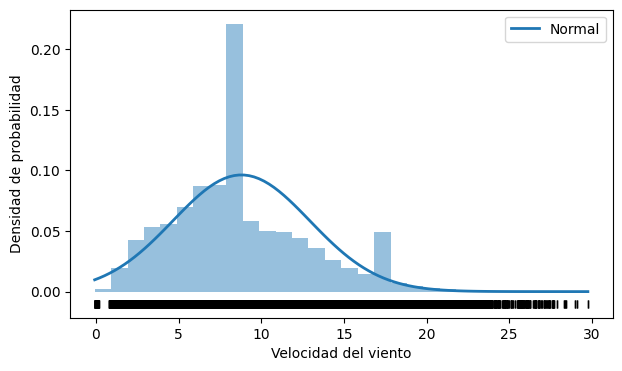

In [43]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['WindSpeed'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['WindSpeed']), np.max(data['WindSpeed']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['WindSpeed'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['WindSpeed'], np.full_like(data['WindSpeed'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Velocidad del viento')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

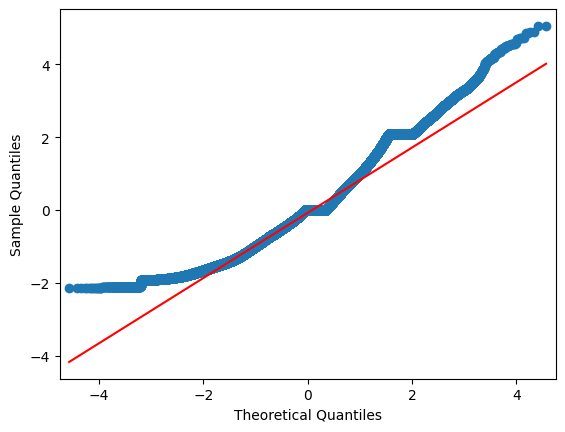

In [44]:
sm.qqplot(data['WindSpeed'],fit=True,line='q');

In [45]:
data['WindSpeed'] = np.exp(data['WindSpeed'])

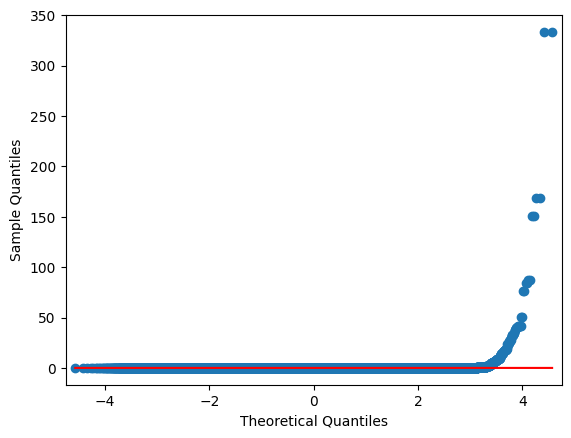

In [46]:
sm.qqplot(data['WindSpeed'],fit=True,line='q');

### Active Power

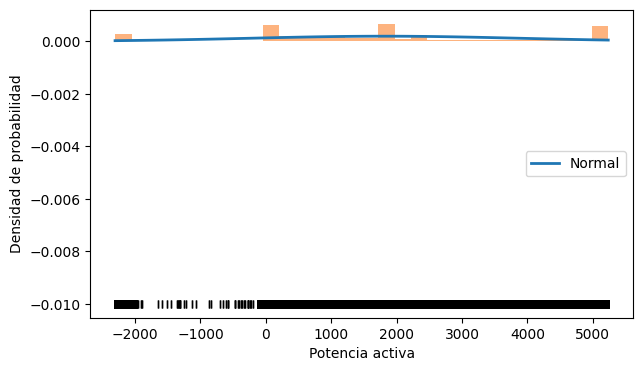

In [59]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['ActivePower'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['ActivePower']), np.max(data['ActivePower']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['ActivePower'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['ActivePower'], np.full_like(data['ActivePower'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Potencia activa')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

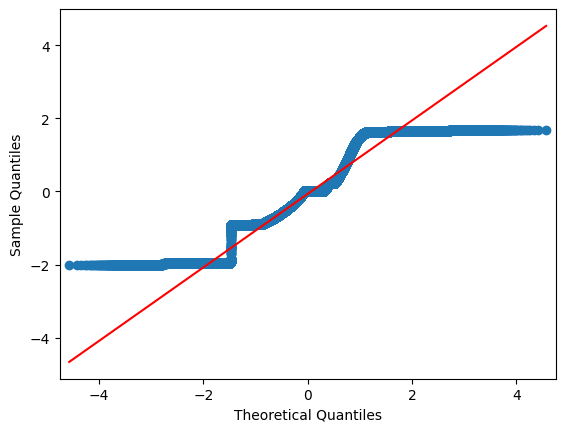

In [49]:
sm.qqplot(data['ActivePower'],fit=True,line='q');

### Wind Direction

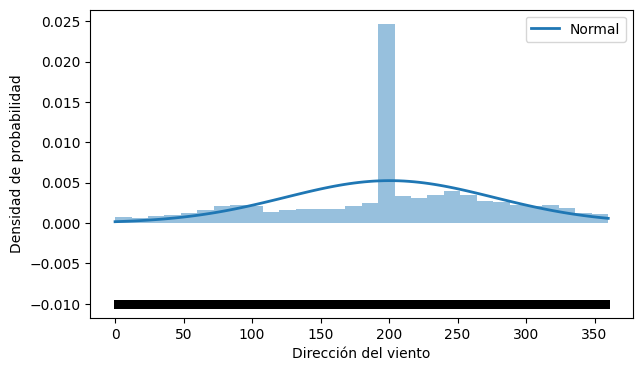

In [50]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['WindDirection'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['WindDirection']), np.max(data['WindDirection']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['WindDirection'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['WindDirection'], np.full_like(data['WindDirection'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Dirección del viento')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

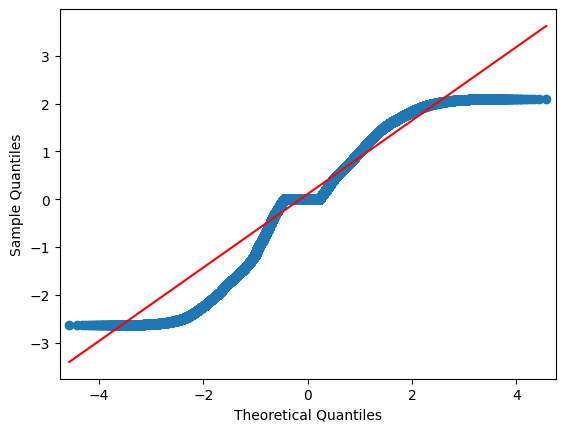

In [53]:
sm.qqplot(data['WindDirection'],fit=True,line='q');

### Yaw Angle

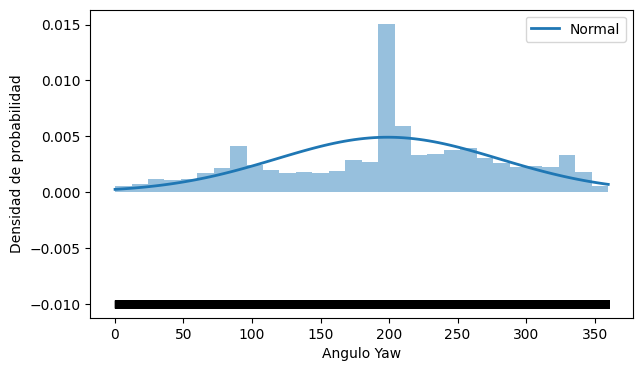

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['YawAngle'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['YawAngle']), np.max(data['YawAngle']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['YawAngle'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['YawAngle'], np.full_like(data['YawAngle'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Angulo Yaw')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

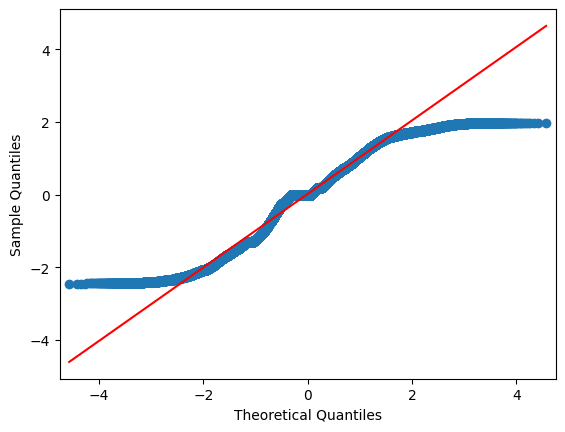

In [ ]:
sm.qqplot(data['YawAngle'],fit=True,line='q');

In [61]:
data.to_csv('../data/processed/datos_normalizados.csv', index=False)